In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix, accuracy_score, f1_score
from scipy import stats

In [2]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 200)


In [4]:
df = pd.read_csv("student-mat.csv", sep=";")
df.columns = df.columns.str.strip()
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
display(df.head())

Shape: (395, 33)
Columns: ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [5]:
print("\nData types:\n", df.dtypes)
print("\nMissing values per column:\n", df.isna().sum())
print("\nNumeric summary:")
display(df.select_dtypes(include=[np.number]).describe())


Data types:
 school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

Missing values per column:
 school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup 

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [6]:
numeric_df = df.select_dtypes(include=[np.number]).copy()  
target = "G3"

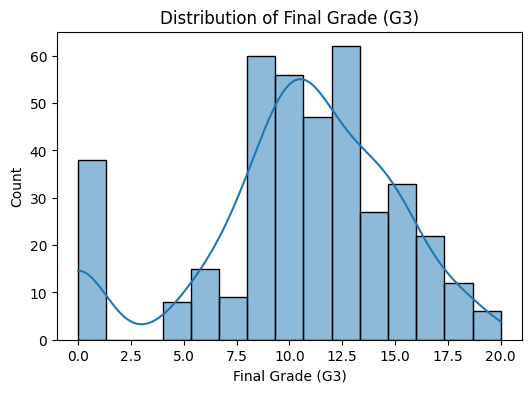

In [7]:
plt.figure(figsize=(6,4))
sns.histplot(numeric_df[target], bins=15, kde=True)
plt.xlabel("Final Grade (G3)")
plt.title("Distribution of Final Grade (G3)")
plt.show()

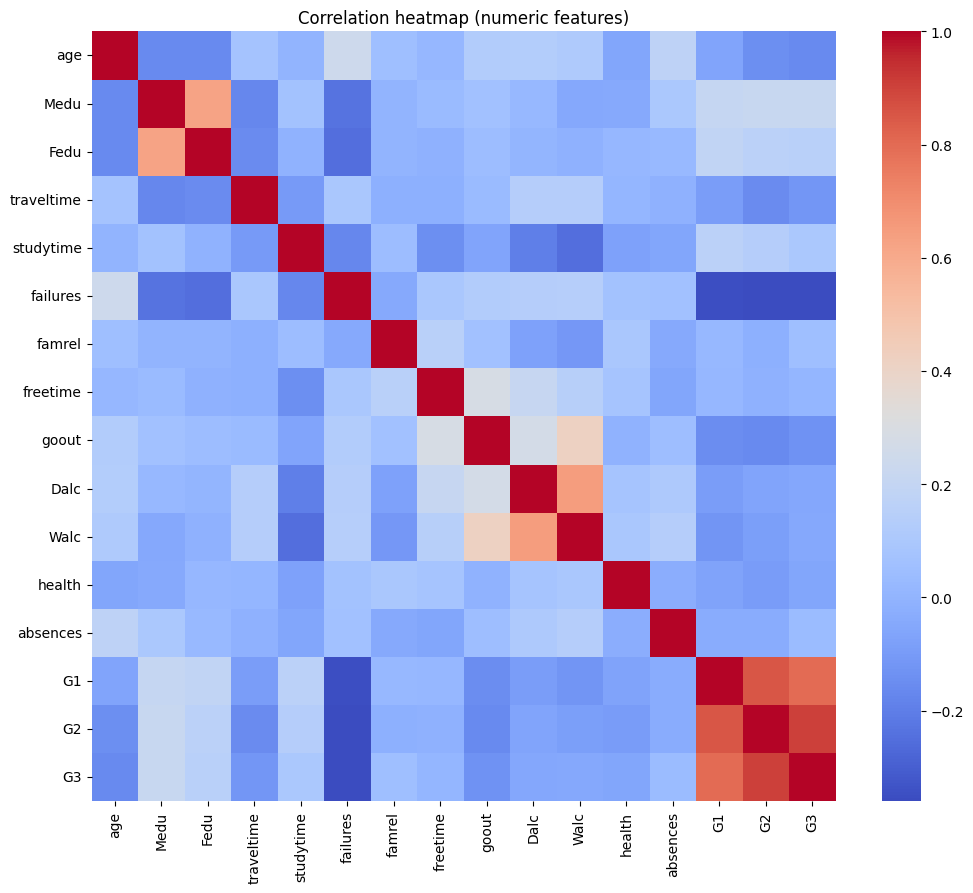

In [8]:
plt.figure(figsize=(12,10))
sns.heatmap(numeric_df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation heatmap (numeric features)")
plt.show()

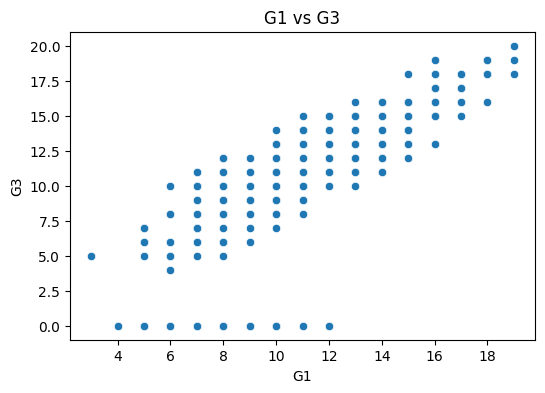

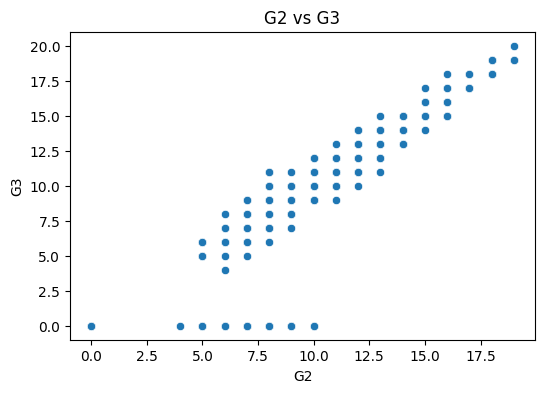

In [10]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="G1", y="G3", data=numeric_df)
plt.title("G1 vs G3")
plt.show()
plt.figure(figsize=(6,4))
sns.scatterplot(x="G2", y="G3", data=numeric_df)
plt.title("G2 vs G3")
plt.show()


Explained variance ratio (PC1, PC2): [0.18900895 0.13312387]
Total explained by 2 PCs: 0.32213281219537726


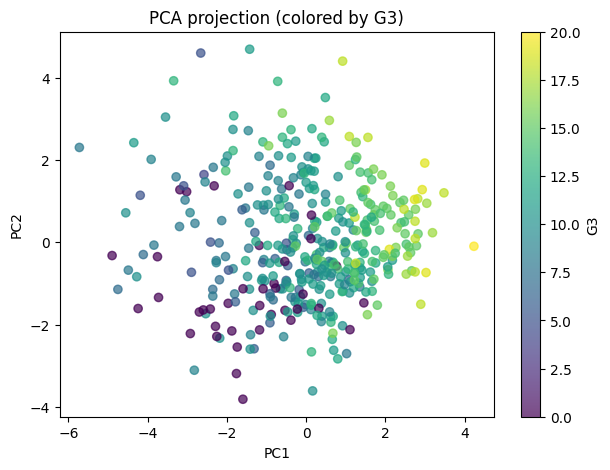

In [11]:
X_all = numeric_df.drop(columns=[target]).values
scaler_for_pca = StandardScaler()
X_all_scaled = scaler_for_pca.fit_transform(X_all)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_all_scaled)
print("Explained variance ratio (PC1, PC2):", pca.explained_variance_ratio_)
print("Total explained by 2 PCs:", pca.explained_variance_ratio_.sum())

plt.figure(figsize=(7,5))
sc = plt.scatter(X_pca[:,0], X_pca[:,1], c=numeric_df[target], cmap="viridis", alpha=0.7)
plt.colorbar(sc, label="G3")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA projection (colored by G3)")
plt.show()

In [12]:
X = numeric_df.drop(columns=[target])
y = numeric_df[target].astype(float)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)


Train shape: (316, 15) Test shape: (79, 15)


In [13]:
X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train.values]
y_train_arr = y_train.values.astype(float)

# Use pseudo-inverse for numerical stability
theta_ne = np.linalg.pinv(X_train_b).dot(y_train_arr)   # shape (n_features+1,)
print("Theta (Normal Equation) length:", theta_ne.shape[0])

# Evaluate on test set
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test.values]
y_pred_ne = X_test_b.dot(theta_ne)
print("Normal Equation -> Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ne)))
print("Normal Equation -> Test R2:", r2_score(y_test, y_pred_ne))


Theta (Normal Equation) length: 16
Normal Equation -> Test RMSE: 2.1222085556607246
Normal Equation -> Test R2: 0.7803580213768333


In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled_b = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]
X_test_scaled_b  = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled]

m = X_train_scaled_b.shape[0]
n = X_train_scaled_b.shape[1]  
alpha = 0.01
iterations = 3000

theta_gd = np.zeros(n)          
y_train_vec = y_train.values.astype(float)

cost_history = []
for it in range(iterations):
    preds = X_train_scaled_b.dot(theta_gd)                    # (m,)
    error = preds - y_train_vec                               # (m,)
    gradients = (2/m) * (X_train_scaled_b.T.dot(error))       # (n,)
    theta_gd -= alpha * gradients
    cost = np.mean(error**2)
    cost_history.append(cost)


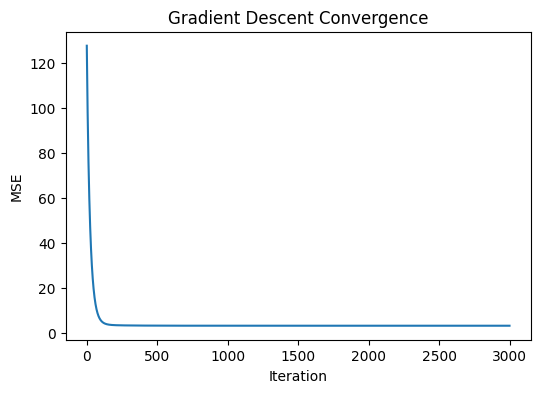

Gradient Descent -> Test RMSE: 2.122207718527076
Gradient Descent -> Test R2: 0.7803581946582521


In [16]:
plt.figure(figsize=(6,4))
plt.plot(cost_history)
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.title("Gradient Descent Convergence")
plt.show()

y_pred_gd = X_test_scaled_b.dot(theta_gd)
print("Gradient Descent -> Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_gd)))
print("Gradient Descent -> Test R2:", r2_score(y_test, y_pred_gd))


In [17]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred_sk = linreg.predict(X_test)

print("Sklearn LinearRegression -> Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_sk)))
print("Sklearn LinearRegression -> Test R2:", r2_score(y_test, y_pred_sk))

coef_df = pd.DataFrame({
    "feature": X.columns,
    "coefficient": linreg.coef_
}).sort_values(by="coefficient", key=lambda s: s.abs(), ascending=False)
display(coef_df)

Sklearn LinearRegression -> Test RMSE: 2.1222085556607255
Sklearn LinearRegression -> Test R2: 0.7803580213768331


,feature,coefficient
14,G2,0.977534
5,failures,-0.416258
6,famrel,0.334612
0,age,-0.198011
2,Fedu,-0.188338
13,G1,0.160748
8,goout,0.137633
3,traveltime,0.131009
9,Dalc,-0.105011
1,Medu,0.094194


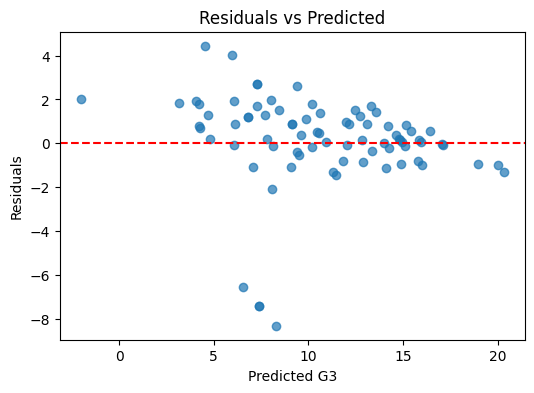

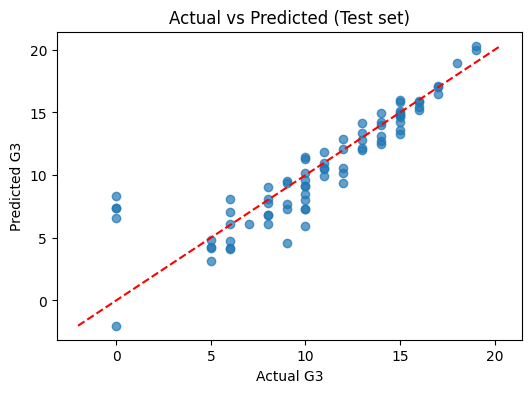

In [18]:
residuals = y_test - y_pred_sk
plt.figure(figsize=(6,4))
plt.scatter(y_pred_sk, residuals, alpha=0.7)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted G3")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()

# Actual vs Predicted
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred_sk, alpha=0.7)
low = min(y_test.min(), y_pred_sk.min())
high = max(y_test.max(), y_pred_sk.max())
plt.plot([low, high], [low, high], color="red", linestyle="--")
plt.xlabel("Actual G3")
plt.ylabel("Predicted G3")
plt.title("Actual vs Predicted (Test set)")
plt.show()


In [19]:
r_abs, p_abs = stats.pearsonr(df["absences"], df["G3"])
print(f"Pearson correlation (absences, G3): r = {r_abs:.3f}, p = {p_abs:.4f}")

g0 = df.loc[df["failures"] == 0, "G3"]
g1 = df.loc[df["failures"] >= 1, "G3"]
t_stat, p_val = stats.ttest_ind(g0, g1, equal_var=False)
print(f"Welch t-test (failures 0 vs >=1): t = {t_stat:.3f}, p = {p_val:.4f}")

study_groups = [df.loc[df["studytime"] == k, "G3"] for k in sorted(df["studytime"].unique())]

study_groups = [g for g in study_groups if len(g) > 1]
F, p_anova = stats.f_oneway(*study_groups)
print(f"ANOVA (studytime groups): F = {F:.3f}, p = {p_anova:.4f}")

Pearson correlation (absences, G3): r = 0.034, p = 0.4973
Welch t-test (failures 0 vs >=1): t = 7.016, p = 0.0000
ANOVA (studytime groups): F = 1.728, p = 0.1607


In [20]:
#STEP 12: Optional — Pass/Fail classification (G3 >= 10 -> pass)

# Create binary target
y_class = (numeric_df[target] >= 10).astype(int)   # 1 = pass, 0 = fail
X_class = numeric_df.drop(columns=[target])

# Train-test split for classification
Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Logistic Regression
logreg = LogisticRegression(max_iter=4000)
logreg.fit(Xc_train, yc_train)
yc_pred_log = logreg.predict(Xc_test)

print("\nLogistic Regression classification report:")
print(classification_report(yc_test, yc_pred_log))
print("Confusion matrix:\n", confusion_matrix(yc_test, yc_pred_log))

# Random Forest (stronger baseline)
rf = RandomForestClassifier(random_state=42)
rf.fit(Xc_train, yc_train)
yc_pred_rf = rf.predict(Xc_test)

print("\nRandom Forest classification report:")
print(classification_report(yc_test, yc_pred_rf))
print("Confusion matrix:\n", confusion_matrix(yc_test, yc_pred_rf))
print("Random Forest accuracy:", accuracy_score(yc_test, yc_pred_rf), "F1:", f1_score(yc_test, yc_pred_rf))



Logistic Regression classification report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93        27
           1       0.98      0.94      0.96        52

    accuracy                           0.95        79
   macro avg       0.94      0.95      0.94        79
weighted avg       0.95      0.95      0.95        79

Confusion matrix:
 [[26  1]
 [ 3 49]]

Random Forest classification report:
              precision    recall  f1-score   support

           0       0.86      0.93      0.89        27
           1       0.96      0.92      0.94        52

    accuracy                           0.92        79
   macro avg       0.91      0.92      0.92        79
weighted avg       0.93      0.92      0.92        79

Confusion matrix:
 [[25  2]
 [ 4 48]]
Random Forest accuracy: 0.9240506329113924 F1: 0.9411764705882353


In [21]:
# Feature importances from Random Forest
feat_imp = pd.DataFrame({
    "feature": X_class.columns,
    "importance": rf.feature_importances_
}).sort_values(by="importance", ascending=False)
display(feat_imp.head(12))


,feature,importance
14,G2,0.403609
13,G1,0.227544
12,absences,0.050654
0,age,0.038960
5,failures,0.037599
8,goout,0.033077
2,Fedu,0.028703
10,Walc,0.027699
7,freetime,0.027032
1,Medu,0.024889


In [22]:
print("\n--- Quick summary ---")
print(f"Sklearn LinearRegression Test R2: {r2_score(y_test, y_pred_sk):.3f}, RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_sk)):.3f}")
print(f"Gradient Descent Test R2: {r2_score(y_test, y_pred_gd):.3f}, RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_gd)):.3f}")
print(f"Normal Equation Test R2: {r2_score(y_test, y_pred_ne):.3f}, RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_ne)):.3f}")
print("Top features (by absolute coefficient):")
display(coef_df.head(10))
print("Hypothesis test examples printed above (pearson, t-test, ANOVA).")


--- Quick summary ---
Sklearn LinearRegression Test R2: 0.780, RMSE: 2.122
Gradient Descent Test R2: 0.780, RMSE: 2.122
Normal Equation Test R2: 0.780, RMSE: 2.122
Top features (by absolute coefficient):


,feature,coefficient
14,G2,0.977534
5,failures,-0.416258
6,famrel,0.334612
0,age,-0.198011
2,Fedu,-0.188338
13,G1,0.160748
8,goout,0.137633
3,traveltime,0.131009
9,Dalc,-0.105011
1,Medu,0.094194


Hypothesis test examples printed above (pearson, t-test, ANOVA).
